# VIX Prognosis Using Quantum Algorithms

In [ ]:
# ✅ Install required libraries (Run this once in Google Colab)
!pip install pennylane numpy pandas yfinance matplotlib

[*********************100%***********************]  1 of 1 completed
<ipython-input-16-f91992a39bb1>:50: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  predicted_next_vix_return = (predicted_quantum_value * float(std_vix)) + float(mean_vix)
<ipython-input-16-f91992a39bb1>:53: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  current_vix = float(vix_close.iloc[-1])  # Ensure it's a float



🔮 Predicted Next VIX Log Return: 0.042285
📈 Predicted Next VIX Value: 19.12
📊 Current VIX: 18.33


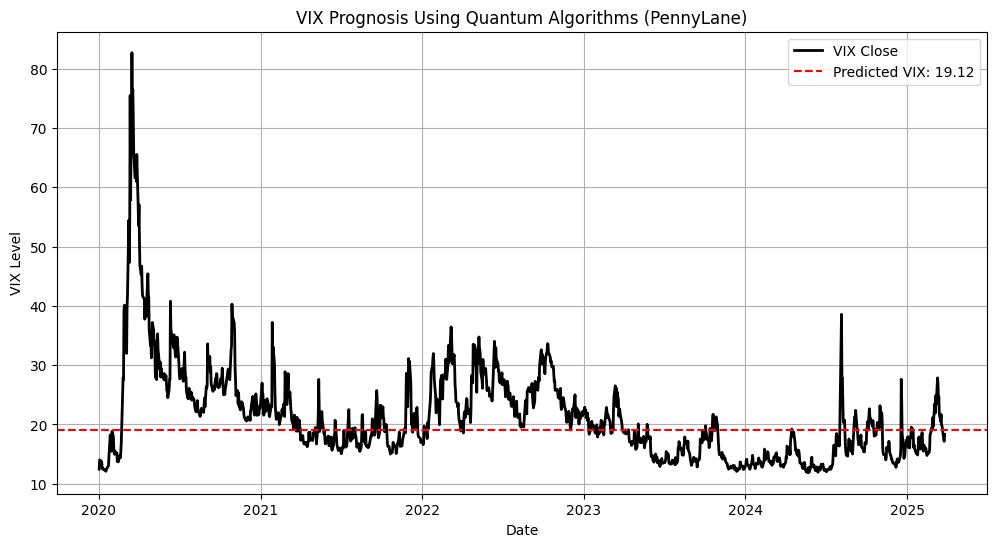

In [16]:
# ✅ Import Libraries
import pennylane as qml
from pennylane import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# ✅ Fetch VIX Data
end_time = pd.to_datetime("today").strftime("%Y-%m-%d")
vix_data = yf.download('^VIX', start='2020-01-01', end=end_time)

# ✅ Compute Log Returns
vix_close = vix_data['Close'].dropna()
vix_returns = np.log(vix_close / vix_close.shift(1)).dropna()

# ✅ Normalize Data for Quantum Computation
mean_vix = vix_returns.mean()  # Use mean() instead of np.mean() for Pandas compatibility
std_vix = vix_returns.std()    # Use std() instead of np.std()
vix_norm = (vix_returns - mean_vix) / std_vix

# ✅ Set up a Quantum Device (3 Qubits)
n_qubits = 3
dev = qml.device("default.qubit", wires=n_qubits)

# ✅ Define Variational Quantum Circuit
@qml.qnode(dev)
def quantum_variational_circuit(params):
    """Quantum variational circuit for Monte Carlo estimation"""
    for i in range(n_qubits):
        qml.Hadamard(wires=i)  # Apply Hadamard gates for superposition

    # Apply variational quantum layers
    qml.StronglyEntanglingLayers(weights=params, wires=range(n_qubits))

    # Measure expectation values
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# ✅ Generate Random Initial Parameters
np.random.seed(42)
init_params = np.random.rand(1, n_qubits, 3) * 2 * np.pi  # 3 layers of rotations

# ✅ Run Quantum Circuit
quantum_output = quantum_variational_circuit(init_params)

# ✅ Convert Quantum Results to Probability Distribution
probabilities = (np.array(quantum_output) + 1) / 2  # Normalize [-1,1] to [0,1]
predicted_quantum_value = float(np.mean(probabilities))  # Convert to standard float

# ✅ Rescale to Real VIX Returns
predicted_next_vix_return = (predicted_quantum_value * float(std_vix)) + float(mean_vix)

# ✅ Predict Next VIX Value
current_vix = float(vix_close.iloc[-1])  # Ensure it's a float
predicted_next_vix = current_vix * np.exp(predicted_next_vix_return)

# ✅ Print Predictions
print(f"\n🔮 Predicted Next VIX Log Return: {predicted_next_vix_return:.6f}")
print(f"📈 Predicted Next VIX Value: {predicted_next_vix:.2f}")
print(f"📊 Current VIX: {current_vix:.2f}")

# ✅ Plot VIX with Prediction
plt.figure(figsize=(12, 6))
plt.plot(vix_close.index, vix_close, label="VIX Close", color="black", linewidth=2)
plt.axhline(y=predicted_next_vix, color='red', linestyle='dashed', label=f"Predicted VIX: {predicted_next_vix:.2f}")
plt.title("VIX Prognosis Using Quantum Algorithms (PennyLane)")
plt.xlabel("Date")
plt.ylabel("VIX Level")
plt.legend()
plt.grid(True)
plt.show()


# Quantum Portfolio Rebalancing Using QAOA

Overview of the Approach
Define Portfolio Optimization:

We consider a two-asset portfolio with SPY (S&P 500 ETF) and VIX.

The goal is to rebalance the portfolio by optimizing asset allocation to maximize the Sharpe Ratio (risk-adjusted return).

Use Quantum Computing:

We frame portfolio optimization as a Quadratic Unconstrained Binary Optimization (QUBO) problem.

Solve it using the Quantum Approximate Optimization Algorithm (QAOA).



In [1]:
pip install pennylane pennylane-qiskit numpy pandas yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.9/249.9 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 

[*********************100%***********************]  2 of 2 completed


Optimized Portfolio Allocation: SPY 0.92, VIX 0.08


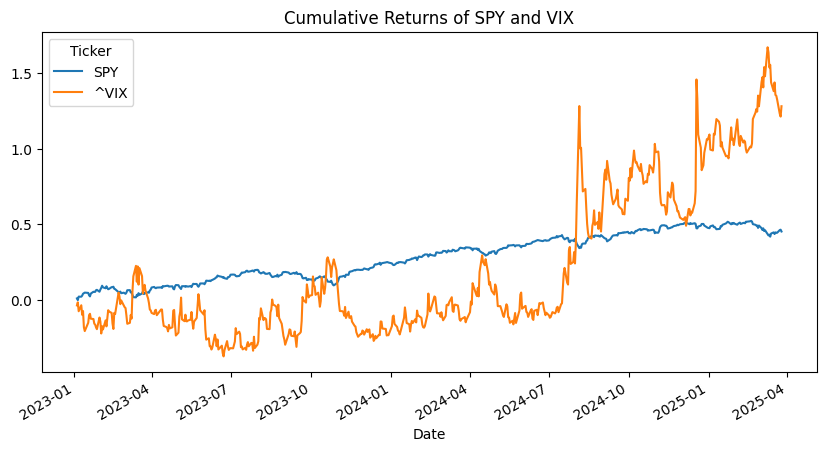

In [9]:
import pennylane as qml
from pennylane import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import datetime as dt
from datetime import datetime

end_time = dt.date.today().strftime("%Y-%m-%d")

# Load historical data for SPY (S&P 500 ETF) and VIX (Volatility Index)
assets = ["SPY", "^VIX"]
#assets = ["QYLP.L", "VIXL.L"]
data = yf.download(assets, start="2023-01-01", end=end_time)["Close"]

# Calculate daily returns
returns = data.pct_change().dropna()

# Compute expected returns and covariance matrix
expected_returns = returns.mean()
cov_matrix = returns.cov()

# Quantum device with 2 qubits (one per asset)
dev = qml.device("default.qubit", wires=2)

# Quantum cost function (Objective: Maximize Sharpe Ratio)
def cost(weights):
    weights = np.array([weights[0], 1 - weights[0]])  # Two assets
    portfolio_return = np.dot(weights, expected_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    return -sharpe_ratio  # Minimize negative Sharpe Ratio

# Define quantum circuit for QAOA
@qml.qnode(dev)
def quantum_circuit(params):
    qml.RX(params[0], wires=0)  # Rotation for asset 1
    qml.RX(params[1], wires=1)  # Rotation for asset 2
    qml.CNOT(wires=[0, 1])      # Entanglement
    return qml.expval(qml.PauliZ(0) + qml.PauliZ(1))

# Optimization using classical-quantum hybrid approach
def qaoa_optimization():
    init_params = np.array([0.5, 0.5])  # Initial quantum parameters
    opt = minimize(cost, init_params, method="COBYLA")  # Classical optimizer
    return opt.x

# Run QAOA to find optimal weights
optimal_weights = qaoa_optimization()
optimal_weights = [optimal_weights[0], 1 - optimal_weights[0]]

# Display results
print(f"Optimized Portfolio Allocation: SPY {optimal_weights[0]:.2f}, VIX {optimal_weights[1]:.2f}")

# Plot asset performance
returns.cumsum().plot(figsize=(10, 5), title="Cumulative Returns of SPY and VIX")
plt.show()
